In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

from tspiral.forecasting import *

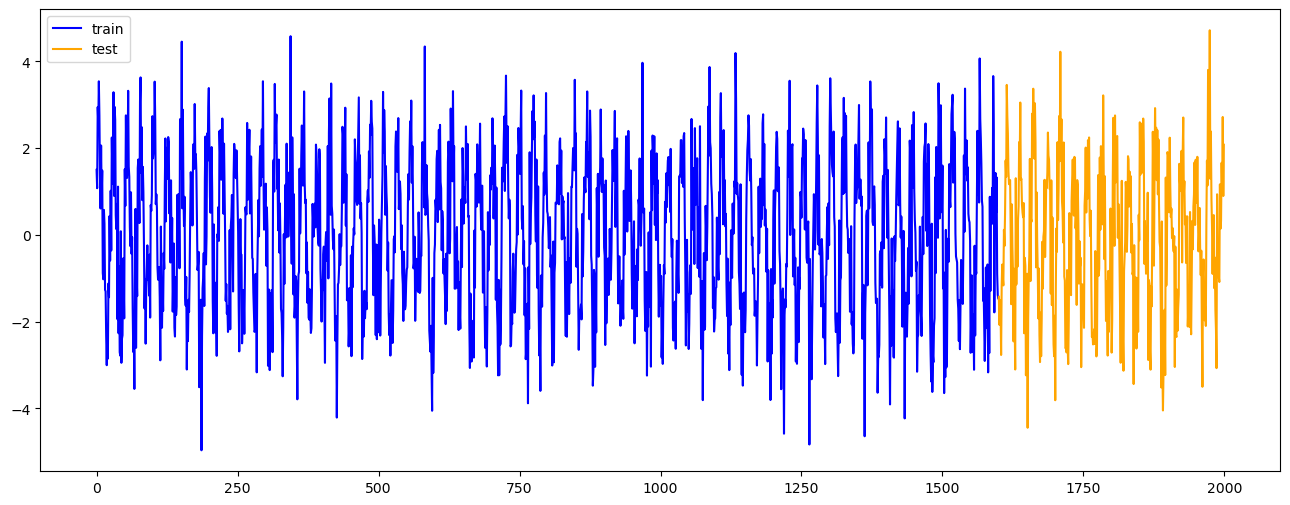

In [2]:
### SYNTETIC DATA GENERATION ###

timesteps = 2_000
e = np.random.normal(0,1, (timesteps,))
X = np.zeros((timesteps,1))
y = 2*np.sin(np.arange(timesteps)*(2*np.pi/24))+e

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

train_range = range(0,len(y_train))
test_range = range(len(y_train),len(y_train)+len(y_test))

plt.figure(figsize=(16,6))
plt.plot(train_range, y_train, c='blue', label='train')
plt.plot(test_range, y_test, c='orange', label='test')
plt.legend(); plt.show()

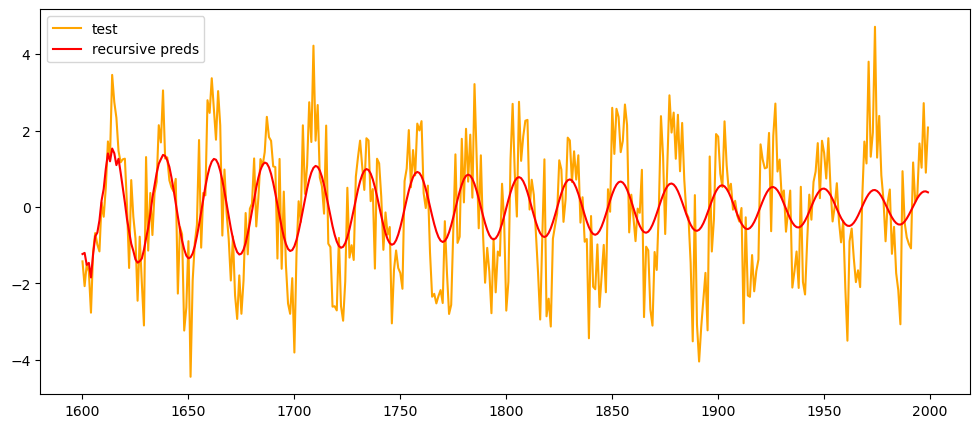

In [3]:
### RECURSIVE FORECASTING ###

model = ForecastingCascade(
    Ridge(),
    lags=range(1,24+1),
    groups=[0],
)
model.fit(X_train, y_train)
y_pred_recursive = model.predict(X_test)

plt.figure(figsize=(12,5))
plt.plot(test_range, y_test, c='orange', label='test')
plt.plot(test_range, y_pred_recursive, c='red', label='recursive preds')
plt.legend(); plt.show()

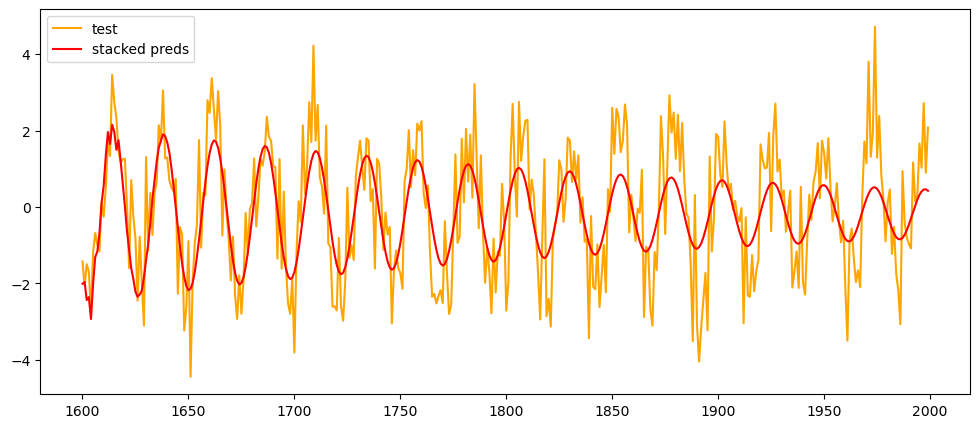

In [4]:
### STACKED FORECASTING ###

model = ForecastingStacked(
    Ridge(),
    final_estimator=Ridge(),
    test_size=len(y_test),
    lags=range(1,24+1),
    groups=[0],
)
model.fit(X_train, y_train)
y_pred_stack = model.predict(X_test)

plt.figure(figsize=(12,5))
plt.plot(test_range, y_test, c='orange', label='test')
plt.plot(test_range, y_pred_stack, c='red', label='stacked preds')
plt.legend(); plt.show()

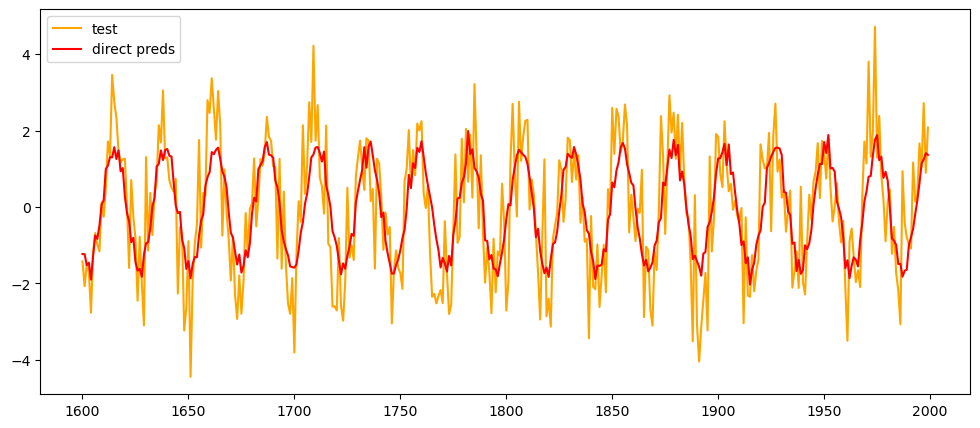

In [5]:
### DIRECT FORECASTING ###

model = ForecastingChain(
    Ridge(),
    n_estimators=len(y_test),
    lags=range(1,24+1),
    groups=[0],
)
model.fit(X_train, y_train)
y_pred_direct = model.predict(X_test)

plt.figure(figsize=(12,5))
plt.plot(test_range, y_test, c='orange', label='test')
plt.plot(test_range, y_pred_direct, c='red', label='direct preds')
plt.legend(); plt.show()

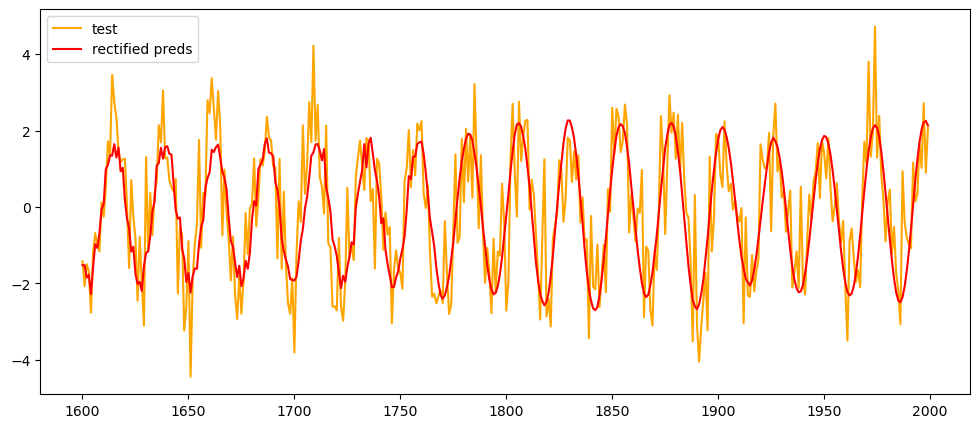

In [6]:
### RECTIFIED FORECASTING ###

model = ForecastingRectified(
    Ridge(),
    final_estimator=Ridge(),
    n_estimators=150,
    test_size=len(y_test),
    lags=range(1,24+1),
    groups=[0],
)
model.fit(X_train, y_train)
y_pred_rect = model.predict(X_test)

plt.figure(figsize=(12,5))
plt.plot(test_range, y_test, c='orange', label='test')
plt.plot(test_range, y_pred_rect, c='red', label='rectified preds')
plt.legend(); plt.show()